# ISLR Chapter 3 - End of Chapter Applied exercises code portion solutions

Exercises from: "An Introduction to Statistical Learning with Applications in R" (Springer, 2013) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions in Python by Arthur Avila

### 8. This question involves the use of simple linear regression on the `Auto` data set.  

####  (a) Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output. For example:  
  
    i. Is there a relationship between the predictor and the response?  
    ii. How strong is the relationship between the predictor and the response?  
    iii. Is the relationship between the predictor and the response positive or negative?  
    iv. What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95% confidence and prediction intervals?

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as stats


auto = pd.read_table('Auto.data', delim_whitespace=True, na_values='?')
auto.dropna(inplace=True)
y = auto.mpg
X = sm.add_constant(auto.horsepower)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

print('\n\nParameters:\n', results.params)

X_pred = X.iloc[0,:]
X_pred.horsepower = 98
print('\n\nPrediction variables\n',X_pred)

predictions = results.get_prediction(X_pred)
print('\n\nConfidence(mean) and Prediction intervals\n',predictions.summary_frame(alpha=0.05))


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           7.03e-81
Time:                        12:13:19   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

/home/arthur/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### (b) Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.

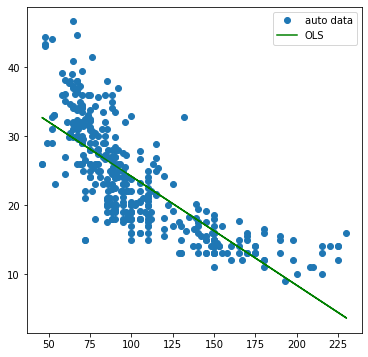

In [3]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(X.horsepower, y, 'o', label="auto data")
ax.plot(X.horsepower, results.fittedvalues, 'g-', label="OLS")
ax.legend(loc='best');

#### (c) Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

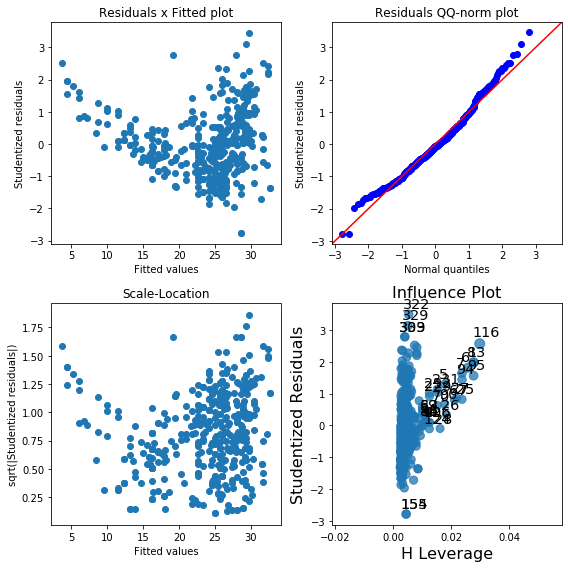

Clearly the wrong functional form for the model.


In [4]:
# We have to build an equivalent in Python
def plotresults(results):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(2,2,1)
    ax.scatter(x=results.fittedvalues, y=results.resid_pearson)
    plt.xlabel('Fitted values')
    plt.ylabel('Studentized residuals')
    plt.title('Residuals x Fitted plot')

    ax = fig.add_subplot(2,2,2)
    sm.qqplot(results.resid_pearson, line='45', fit=True, ax=ax)
    plt.xlabel('Normal quantiles')
    plt.ylabel('Studentized residuals')
    plt.title('Residuals QQ-norm plot')

    ax = fig.add_subplot(2,2,3)
    ax.scatter(x=results.fittedvalues, y=np.sqrt(np.abs(results.resid_pearson)))
    plt.xlabel('Fitted values')
    plt.ylabel('sqrt(|Studentized residuals|)')
    plt.title('Scale-Location')

    ax=fig.add_subplot(2,2,4)
    sm.graphics.influence_plot(results, size=10, ax=ax, alpha=0.01)
    plt.tight_layout()
    plt.show()

plotresults(results)
print('Clearly the wrong functional form for the model.')

### 9. This question involves the use of multiple linear regression on the `Auto` data set.  

#### (a) Produce a scatterplot matrix which includes all of the variables in the data set.

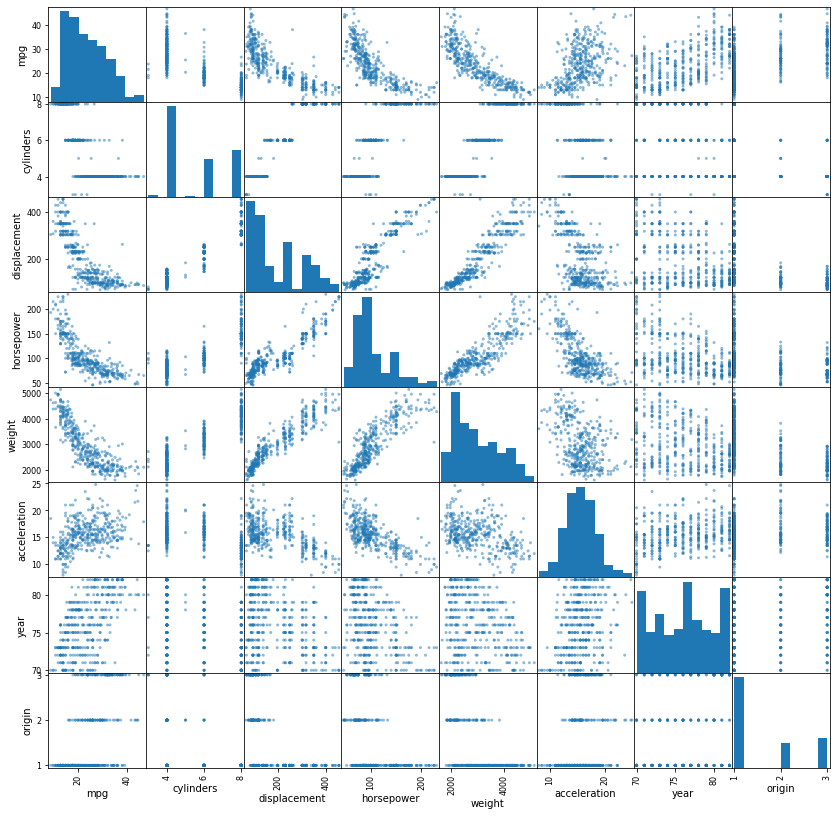

In [5]:
pd.plotting.scatter_matrix(auto, figsize=(14,14))
plt.show()

####  (b) Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the name variable, which is qualitative.  

In [6]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


####  (c) Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except name as the predictors. Use the `summary()` function to print the results. Comment on the output. For instance:  
    i. Is there a relationship between the predictors and the response?  
    ii. Which predictors appear to have a statistically significant relationship to the response?  
    iii. What does the coefficient for the `year` variable suggest?  

In [7]:
X = sm.add_constant(auto.iloc[:,1:8])
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 19 Sep 2019   Prob (F-statistic):          2.04e-139
Time:                        12:13:25   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

####  (d) Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?  

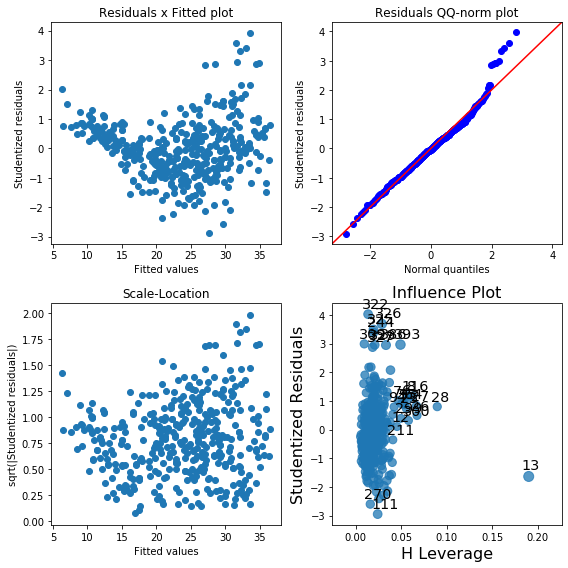

18 outlier(s)
4 extreme outlier(s)
17 point(s) with high leverage
1 likely influential point(s)


In [8]:
import statsmodels.stats.outliers_influence as oi
def reportf(results):
    plotresults(results)
    outl = np.abs(results.resid_pearson)>2
    xtout = np.abs(results.resid_pearson)>3
    measures = oi.OLSInfluence(results)
    N = results.nobs
    p = results.params.count()
    leverage = measures.hat_matrix_diag > 2*p/N
    influential = outl & leverage
    print(f"{outl.sum()} outlier(s)")
    print(f"{xtout.sum()} extreme outlier(s)")
    print(f"{leverage.sum()} point(s) with high leverage")
    print(f"{influential.sum()} likely influential point(s)")

reportf(results)

####  (e) Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?  

In [9]:
X = sm.add_constant(auto.iloc[:,1:8])
model = smf.ols("mpg ~ (cylinders + displacement + horsepower + weight + acceleration + year + origin)**2", data=auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Thu, 19 Sep 2019   Prob (F-statistic):          4.01e-155
Time:                        12:13:26   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

####  (f) Try a few different transformations of the variables, such as $\log(X)$, $\sqrt X$, $X^2$. Comment on your findings.

In [10]:
# Really only looking at how to write the formula
model = smf.ols("mpg ~ (cylinders + np.log(displacement) + np.sqrt(horsepower) + I(1/weight) + acceleration + year + origin)**2", data=auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.8
Date:                Thu, 19 Sep 2019   Prob (F-statistic):          1.71e-155
Time:                        12:13:26   Log-Likelihood:                -928.79
No. Observations:                 392   AIC:                             1916.
Df Residuals:                     363   BIC:                             2031.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### 10. This question should be answered using the `Carseats` data set.
#### (a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban` , and `US`.

In [11]:
Carseats = pd.read_csv('Carseats.csv')
print(Carseats.head())
print(Carseats.info())
model = smf.ols('Sales~Price+Urban+US', data=Carseats)
results = model.fit()
print(results.summary())

   Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  \
0           1   9.50        138      73           11         276    120   
1           2  11.22        111      48           16         260     83   
2           3  10.06        113      35           10         269     80   
3           4   7.40        117     100            4         466     97   
4           5   4.15        141      64            3         340    128   

  ShelveLoc  Age  Education Urban   US  
0       Bad   42         17   Yes  Yes  
1      Good   65         10   Yes  Yes  
2    Medium   59         12   Yes  Yes  
3    Medium   55         14   Yes  Yes  
4       Bad   38         13   Yes   No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0     400 non-null int64
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-nul

#### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

Price: Marginal change on sales for a unit increase in Price.  
Urban/US: Intercept change from changing status 'No' to 'Yes'.

#### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

\begin{equation}
Sales_t = 
    \begin{cases} 
        \beta_0 + \beta_3~Price_t + \varepsilon_t 
            & \quad \text{if} \quad (Urban, US) = (\text{'No'} , \text{'No'}) \\
        (\beta_0 + \beta_1) + \beta_3~Price_t + \varepsilon_t 
            & \quad \text{if} \quad (Urban, US) = (\text{'Yes'} , \text{'No'}) \\
        (\beta_0 + \beta_2) + \beta_3~Price_t + \varepsilon_t 
            & \quad \text{if} \quad (Urban, US) = (\text{'No'} , \text{'Yes'}) \\
        (\beta_0 + \beta_1 + \beta_2) + \beta_3~Price_t + \varepsilon_t 
            & \quad \text{if} \quad (Urban, US) = (\text{'Yes'} , \text{'Yes'})
    \end{cases}
\end{equation}

#### (d) For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?
At $\alpha=0.05$ we reject all but $\beta_1 = 0$.

#### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [12]:
model2 = smf.ols('Sales~Price+US', data=Carseats)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           2.66e-24
Time:                        12:13:26   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

#### (f) How well do the models in (a) and (e) fit the data?

Original Model


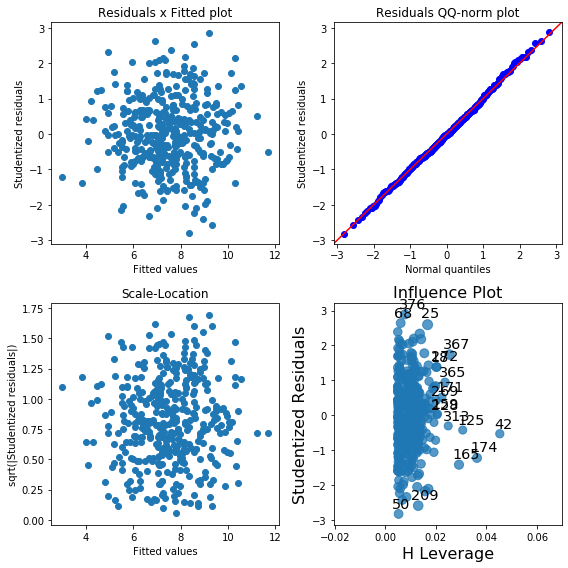

23 outlier(s)
0 extreme outlier(s)
13 point(s) with high leverage
0 likely influential point(s)
                               Breusch-Pagan Heteroskedasticity Test
Lagrange multiplier statistic                               6.814686
p-value                                                     0.078045
f-value                                                     2.287823
f p-value                                                   0.078095
                            Anderson-Darling Normality Test
Anderson-Darling statistic                         0.198754
p-value                                            0.885538



Reduced Model


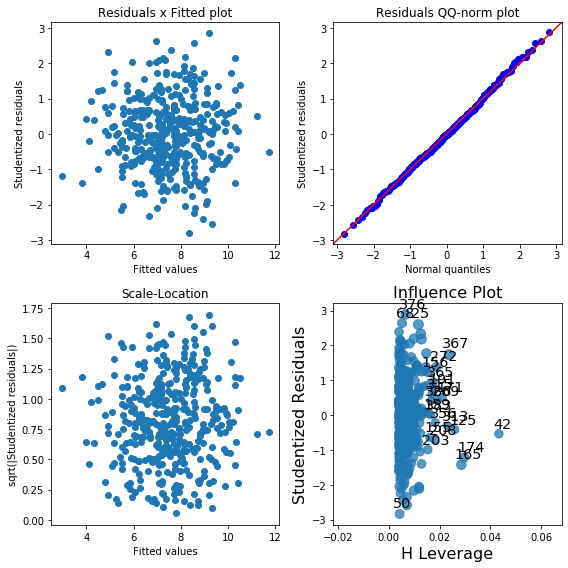

23 outlier(s)
0 extreme outlier(s)
20 point(s) with high leverage
0 likely influential point(s)
                               Breusch-Pagan Heteroskedasticity Test
Lagrange multiplier statistic                               4.931432
p-value                                                     0.084948
f-value                                                     2.477770
f p-value                                                   0.085227
                            Anderson-Darling Normality Test
Anderson-Darling statistic                         0.196457
p-value                                            0.888797


In [13]:
def resid_tests(result):
    name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    test = sm.stats.het_breuschpagan(result.resid, result.model.exog)
    print(pd.DataFrame(test,name,['Breusch-Pagan Heteroskedasticity Test']))
    name = ['Anderson-Darling statistic', 'p-value']
    test = sm.stats.diagnostic.normal_ad(result.resid)
    print(pd.DataFrame(test,name,['Anderson-Darling Normality Test']))
print('Original Model')
reportf(results)
resid_tests(results)
print('\n\n\nReduced Model')
reportf(results2)
resid_tests(results2)

#### (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [14]:
results2.conf_int() # also part of the summary in Python for statsmodels package

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


#### (h) Is there evidence of outliers or high leverage observations in the model from (e)?

In [15]:
# Already reported under the graph on item (f)

### 11. In this problem we will investigate the t-statistic for the null hypothesis $H_0 : \beta = 0$ in simple linear regression without an intercept. To begin, we generate a predictor `x` and a response `y` as follows.

```
> set.seed(1)
> x = rnorm(100)
> y = 2*x+rnorm(100)
```

In [16]:
np.random.seed(1)
x = np.random.normal(size=100)
y = 2*x+np.random.normal(size=100)

#### (a) Perform a simple linear regression of y onto x , without an intercept. Report the coefficient estimate $\hat\beta$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results. (You can perform regression without an intercept using the command `lm(y∼x+0)`.)

In [17]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Thu, 19 Sep 2019   Prob (F-statistic):                    3.46e-36
Time:                        12:13:29   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### (b) Now perform a simple linear regression of `x` onto `y` without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results.

In [18]:
model2 = sm.OLS(x,y)
results2 = model2.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Thu, 19 Sep 2019   Prob (F-statistic):                    3.46e-36
Time:                        12:13:29   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### (c) What is the relationship between the results obtained in (a) and (b)?

t-value, R-squared, and F-statistic are the same. Coefficients are not the inverse of each other (minimize SSR on vertical distance, not Euclidian distance). 

#### (d) For the regression of $Y$ onto $X$ without an intercept, the t-statistic for $H_0 : \beta = 0$ takes the form $\hat\beta/SE(\hat\beta)$, where $\hat\beta$ is given by (3.38), and where
$$
SE(\hat\beta)=\sqrt{\frac{\sum_{i=1}^{n}(y_i-x_i\hat\beta)^2}{(n-1)\sum_{i'=1}^{n}x_{i'}^2}}.
$$
#### (These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in `R` , that the t-statistic can be written as
$$
\frac{\sqrt{n-1}\sum_{i=1}^nx_iy_i}
     {\sqrt{(\sum_{i=1}^nx_i^2)(\sum_{i=1}^ny_i^2)-(\sum_{i=1}^nx_iy_i)^2}}.
$$

\begin{align}
\hat\beta &= \frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}\\
SE(\hat\beta)&=\sqrt{\frac{\sum_{i=1}^{n}(y_i-x_i\hat\beta)^2}{(n-1)\sum_{i=1}^{n}x_i^2}}
             =\sqrt{\frac{\sum_{i=1}^{n}y_i^2+\hat\beta^2\sum_{i=1}^{n}x_i^2 -2\hat\beta\sum_{i=1}^{n}x_iy_i}{(n-1)\sum_{i=1}^{n}x_i^2}}\\
SE(\hat\beta)&=\sqrt{\frac{\sum_{i=1}^{n}y_i^2+\left(\frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}\right)^2\sum_{i=1}^{n}x_i^2 -2\left(\frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}\right)\sum_{i=1}^{n}x_iy_i}{(n-1)\sum_{i=1}^{n}x_i^2}}\\
SE(\hat\beta)&=\sqrt{\frac{\left(\sum_{i=1}^{n}y_i^2\right)\left(\sum_{i=1}^{n}x_i^2\right)+\left(\sum_{i=1}^nx_iy_i\right)^2 -2\left(\sum_{i=1}^nx_iy_i\right)^2}{(n-1)\left(\sum_{i=1}^{n}x_i^2\right)^2}}\\
SE(\hat\beta)&=\sqrt{\frac{\left(\sum_{i=1}^{n}y_i^2\right)\left(\sum_{i=1}^{n}x_i^2\right)-\left(\sum_{i=1}^nx_iy_i\right)^2}{(n-1)\left(\sum_{i=1}^{n}x_i^2\right)^2}}\\
\frac{\hat\beta}{SE(\hat\beta)}&=\sqrt{\frac{(n-1)\left(\sum_{i=1}^{n}x_i^2\right)^2}{\left(\sum_{i=1}^{n}y_i^2\right)\left(\sum_{i=1}^{n}x_i^2\right)-\left(\sum_{i=1}^nx_iy_i\right)^2}}\frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}\\
\frac{\hat\beta}{SE(\hat\beta)}&=\frac{\sqrt{(n-1)}\sum_{i=1}^nx_iy_i}{\sqrt{\left(\sum_{i=1}^{n}y_i^2\right)\left(\sum_{i=1}^{n}x_i^2\right)-\left(\sum_{i=1}^nx_iy_i\right)^2}}
\end{align}

In [19]:
print(np.sqrt(99*np.sum(x*y)**2/(np.sum(x**2)*np.sum(y**2)-np.sum(x*y)**2)))
print(results.tvalues[0])
# close enough

19.791801987091205
19.79180198709121


#### (e) Using the results from (d), argue that the t-statistic for the regression of `y` onto `x` is the same as the t-statistic for the regression of `x` onto `y`.

The formula is symmetric on $x$ and $y$.

#### (f) In `R` , show that when regression is performed with an intercept, the t-statistic for $H_0 : \beta_1 = 0$ is the same for the regression of `y` onto `x` as it is for the regression of `x` onto `y`.

In [20]:
results = sm.OLS(y,sm.add_constant(x)).fit()
print(results.tvalues[1])
results2 = sm.OLS(x,sm.add_constant(y)).fit()
print(results2.tvalues[1])

19.782585315629255
19.782585315629255


### 12. This problem involves simple linear regression without an intercept.

#### (a) Recall that the coefficient estimate $\hat\beta$ for the linear regression of $Y$ onto $X$ without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of $X$ onto $Y$ the same as the coefficient estimate for the regression of $Y$ onto $X$?

$$
\hat\beta_x = \hat\beta_y \iff \frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2} = \frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^ny_i^2} \iff \sum_{i=1}^nx_i^2 = \sum_{i=1}^ny_i^2
$$

#### (b) Generate an example in `R` with $n = 100$ observations in which the coefficient estimate for the regression of $X$ onto $Y$ is *different* from the coefficient estimate for the regression of $Y$ onto $X$.

In [21]:
np.random.seed(42)
x = np.random.normal(size=100)
y = x+np.random.normal(size=100)/10

results = sm.OLS(y,x).fit()
print(results.params)
results2 = sm.OLS(x,y).fit()
print(results2.params)

[0.98558105]
[1.00359406]


#### (c) Generate an example in `R` with $n = 100$ observations in which the coefficient estimate for the regression of $X$ onto $Y$ is *the same* from the coefficient estimate for the regression of $Y$ onto $X$.

In [22]:
y[99] = np.sqrt(np.abs(np.sum(y[0:99]**2)-np.sum(x**2)))
results = sm.OLS(y,x).fit()
print(results.params)
results2 = sm.OLS(x,y).fit()
print(results2.params)

[0.98099764]
[0.98099764]


### 13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use `set.seed(1)` prior to starting part (a) to ensure consistent results.

#### (a) Using the `rnorm()` function, create a vector, `x`, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, $X$.

In [23]:
np.random.seed(1)
x = np.random.normal(size=100)
x

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
        0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
        0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
       -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       -0.07557171,  1.13162939,  1.51981682,  2.18557541, -1.39

#### (b) Using the `rnorm()` function, create a vector, `eps` , containing 100 observations drawn from a $N(0, 0.25)$ distribution i.e. a normal distribution with mean zero and variance 0.25.

In [24]:
eps = np.random.normal(0,.25,100)
eps

array([-0.11178214,  0.30612693,  0.10087291,  0.14839463, -0.27372796,
        0.04234561,  0.18513911, -0.23842515, -0.06655463,  0.00815364,
       -0.34327933,  0.07878985,  0.21154016, -0.21487899,  0.08763649,
       -0.32807085, -0.00967388, -0.40394309,  0.28035443,  0.10222513,
       -0.00615424, -0.1937904 ,  0.31843898,  0.49177544, -0.46449547,
        0.30904101,  0.40691269,  0.08450292, -0.29981701,  0.21583633,
       -0.04523008, -0.15098016, -0.30751453,  0.13763437,  0.19820172,
       -0.15588268,  0.13014408, -0.28608535,  0.20046526,  0.01164182,
       -0.04664244, -0.02543647,  0.21722154,  0.18760291,  0.13236633,
        0.0344253 ,  0.01945528,  0.15459507,  0.05812364,  0.17063785,
       -0.07752919, -0.60870944,  0.25970615,  0.54674491,  0.11034111,
       -0.02503881, -0.03411119, -0.02976355,  0.00435235, -0.28050468,
       -0.12927361, -0.24925671,  0.06219979, -0.07416029,  0.12380283,
       -0.04367579,  0.2465838 ,  0.05338348,  0.54767493, -0.47

#### (c) Using `x` and `eps`, generate a vector `y` according to the model
$$
Y = −1 + 0.5X + \varepsilon.
$$
#### What is the length of the vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

$\beta_0=-1$ and $\beta_1=0.5$

In [25]:
y = -1 + 0.5*x+eps
np.shape(y)

(100,)

#### (d) Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

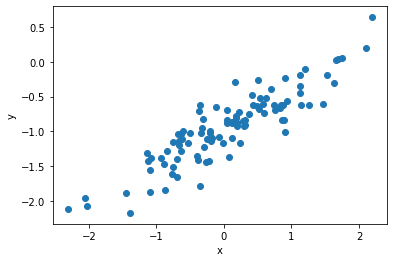

In [26]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### (e) Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat\beta_0$ and $\hat\beta_1$ compare to $\beta_0$ and $\beta_1$?

In [27]:
model = sm.OLS(y,sm.add_constant(x))
results = model.fit()
print(results.summary())
print("\n\npretty close to the real values")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           5.39e-36
Time:                        12:13:30   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9632      0.023    -40.999      0.0

#### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` command to create an appropriate legend.

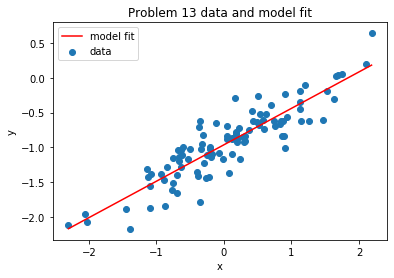

In [28]:
plt.scatter(x,y, label='data')
xl = [min(x),max(x)]
yl = [min(results.fittedvalues),max(results.fittedvalues)]
plt.plot(xl,yl, 'r-', label = 'model fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problem 13 data and model fit')
plt.legend()
plt.show()

#### (g) Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$ . Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [29]:
X = np.column_stack([np.ones(100),x,x**2])
model2 = sm.OLS(y,X)
results2 = model2.fit()
print(results2.summary())
print('\n\nQuadratic term is not significant, no significant improvement')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           1.32e-34
Time:                        12:13:30   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9663      0.029    -33.486      0.0

#### (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is *less* noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\varepsilon$ in (b). Describe your results.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2314.
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           5.58e-70
Time:                        12:13:30   Log-Likelihood:                 95.820
No. Observations:                 100   AIC:                            -187.6
Df Residuals:                      98   BIC:                            -182.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9853      0.009   -104.844      0.0

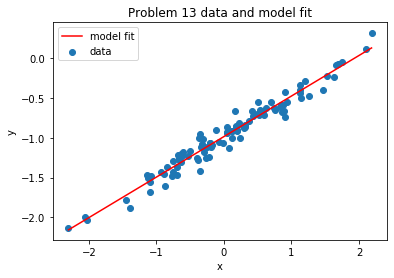

In [30]:
def a_to_f(sd):
    np.random.seed(1)
    x = np.random.normal(size=100)
    eps = np.random.normal(0,sd,100)
    y = -1 + 0.5*x+eps
    model = sm.OLS(y,sm.add_constant(x))
    results = model.fit()
    print(results.summary())
    plt.scatter(x,y, label='data')
    xl = [min(x),max(x)]
    yl = [min(results.fittedvalues),max(results.fittedvalues)]
    plt.plot(xl,yl, 'r-', label = 'model fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Problem 13 data and model fit')
    plt.legend()
    plt.show()

a_to_f(.1)

#### (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is *more* noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\varepsilon$ in (b). Describe your results.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           2.20e-17
Time:                        12:13:31   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.0

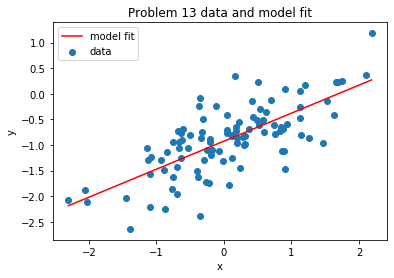

In [31]:
a_to_f(0.5)

#### (j) What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [32]:
# already on summary table. Refresher:
print(results.conf_int())

[[-1.00987048 -0.91662275]
 [ 0.47130669  0.57640688]]


### 14. This problem focuses on the collinearity problem.

#### (a) Perform the following commands in `R`:
```
> set.seed(1)
> x1=runif(100)
> x2=0.5*x1+rnorm(100)/10
> y=2+2*x1+0.3*x2+rnorm(100)
```
#### The last line corresponds to creating a linear model in which `y` is a function of `x1` and `x2` . Write out the form of the linear model. What are the regression coefficients?

$$
y = \beta_0 + \beta_1~x_1+\beta_2~x_2+\varepsilon
$$
With $\beta_0 = 2$, $\beta_1 = 2$, and $\beta_2=0.3$.

In [33]:
np.random.seed(1)
x1=np.random.random(100)
x2=0.5*x1+np.random.randn(100)/10
y=2+2*x1+0.3*x2+np.random.randn(100)

#### (b) What is the correlation between `x1` and `x2`? Create a scatterplot displaying the relationship between the variables.

[[1.         0.83905962]
 [0.83905962 1.        ]]


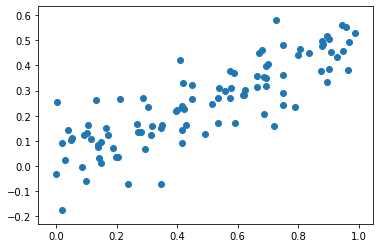

In [34]:
print(np.corrcoef(x1,x2))

plt.scatter(x1,x2)
plt.show()

#### (c) Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are $\hat\beta_0$, $\hat\beta_1$ , and $\hat\beta_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?

In [35]:
X = np.c_[np.ones(100),x1,x2]
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
print("\n\nReject beta_2 = 0 but not beta_1 = 0")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           4.40e-07
Time:                        12:13:31   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.0

#### (d) Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [36]:
model1 = sm.OLS(y,sm.add_constant(x1))
results1 = model1.fit()
print(results1.summary())
print("\n\nReject beta_1 = 0")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           6.68e-07
Time:                        12:13:31   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.0

#### (e) Now fit a least squares regression to predict `y` using only `x2`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [37]:
model2 = sm.OLS(y,sm.add_constant(x2))
results2 = model2.fit()
print(results2.summary())
print("\n\nReject beta_1 = 0")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           1.09e-07
Time:                        12:13:32   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.0

#### (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.  

Reduced model:
\begin{align}
y &= \beta_0 + \beta_1x_1 + \beta_2x_2 + \varepsilon_y \\
y &= \beta_0 + \beta_1x_1 + \beta_2(\alpha_0 + \alpha_1x_1 + \varepsilon_x) + \varepsilon_y \\
y &= (\beta_0 + \beta_2\alpha_0) + (\beta_1 + \alpha_1\beta_2)x_1 + (\beta_2\varepsilon_x + \varepsilon_y) \\
y &= \beta_0^* + \beta_1^* x_1 + \varepsilon_y^*
\end{align}

#### (g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.
````
> x1 = c(x1, 0.1)
> x2 = c(x2, 0.8)
> y = c(y, 6)
````
#### Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           5.51e-08
Time:                        12:13:32   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1996      0.199     11.041      0.0

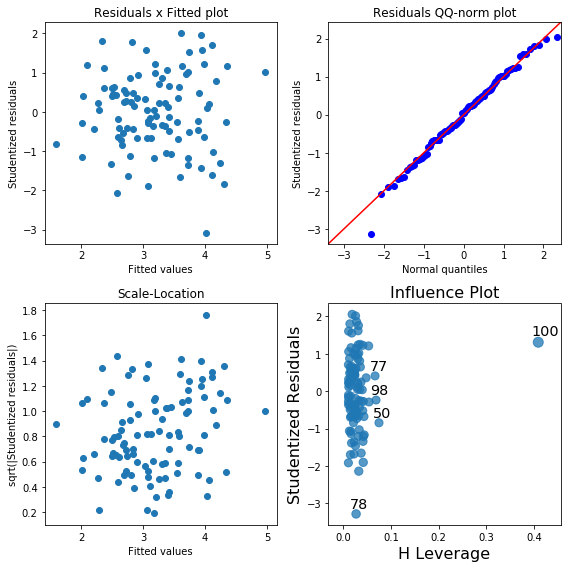

3 outlier(s)
1 extreme outlier(s)
4 point(s) with high leverage
0 likely influential point(s)
New point is an outlier: False
New point is an extreme outlier: False
New point is high leverage:True
New point is likely influential: False


In [38]:
x1 = np.append(x1,0.1)
x2 = np.append(x2,0.8)
y = np.append(y,6)

def reportf(y,X):
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())
    
    plotresults(results)
    
    outl = np.abs(results.resid_pearson)>2
    xtout = np.abs(results.resid_pearson)>3
    measures = oi.OLSInfluence(results)
    N = np.int64(results.nobs)
    p = results.params.size
    leverage = measures.hat_matrix_diag > 2*p/N
    influential = outl & leverage
    print(f"{outl.sum()} outlier(s)")
    print(f"{xtout.sum()} extreme outlier(s)")
    print(f"{leverage.sum()} point(s) with high leverage")
    print(f"{influential.sum()} likely influential point(s)")
    newpoint = (outl[N-1], xtout[N-1], leverage[N-1], influential[N-1])
    print(f'New point is an outlier: {newpoint[0]}')
    print(f"New point is an extreme outlier: {newpoint[1]}")
    print(f"New point is high leverage:{newpoint[2]}")
    print(f"New point is likely influential: {newpoint[3]}")
    
reportf(y,np.c_[np.ones(101),x1,x2])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           9.15e-06
Time:                        12:13:32   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3583      0.208     11.331      0.0

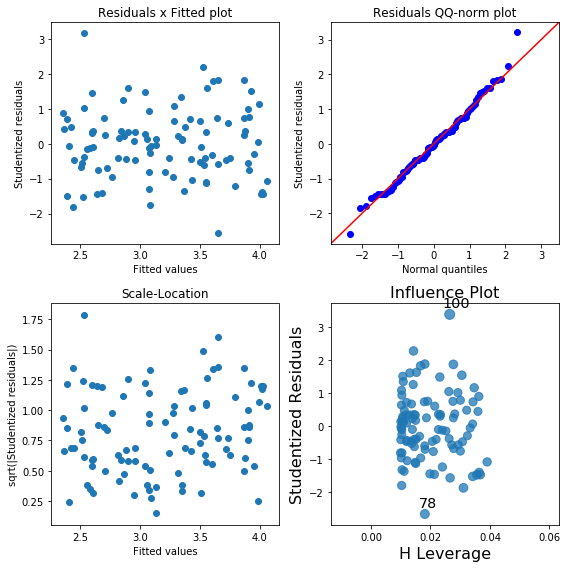

3 outlier(s)
1 extreme outlier(s)
0 point(s) with high leverage
0 likely influential point(s)
New point is an outlier: True
New point is an extreme outlier: True
New point is high leverage:False
New point is likely influential: False


In [39]:
reportf(y,np.c_[np.ones(101),x1])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           7.41e-09
Time:                        12:13:33   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2331      0.182     12.271      0.0

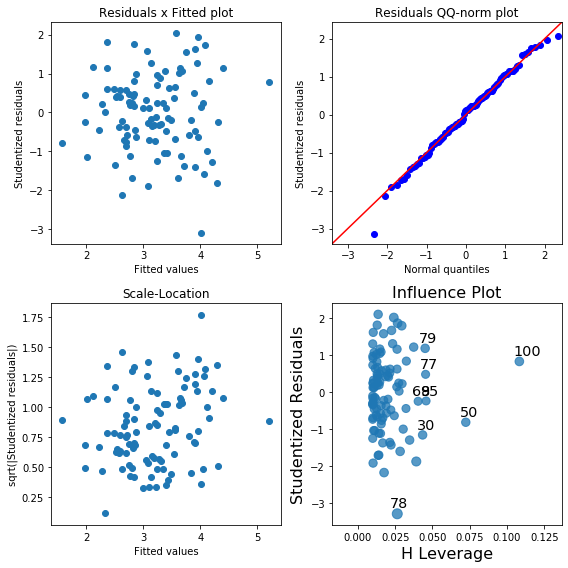

3 outlier(s)
1 extreme outlier(s)
7 point(s) with high leverage
0 likely influential point(s)
New point is an outlier: False
New point is an extreme outlier: False
New point is high leverage:True
New point is likely influential: False


In [40]:
reportf(y,np.c_[np.ones(101),x2])

### 15. This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

#### (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           1.17e-19
Time:                        12:13:37   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.0

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           2.49e-74
Time:                        12:13:37   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           1.61e-34
Time:                        12:13:37   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

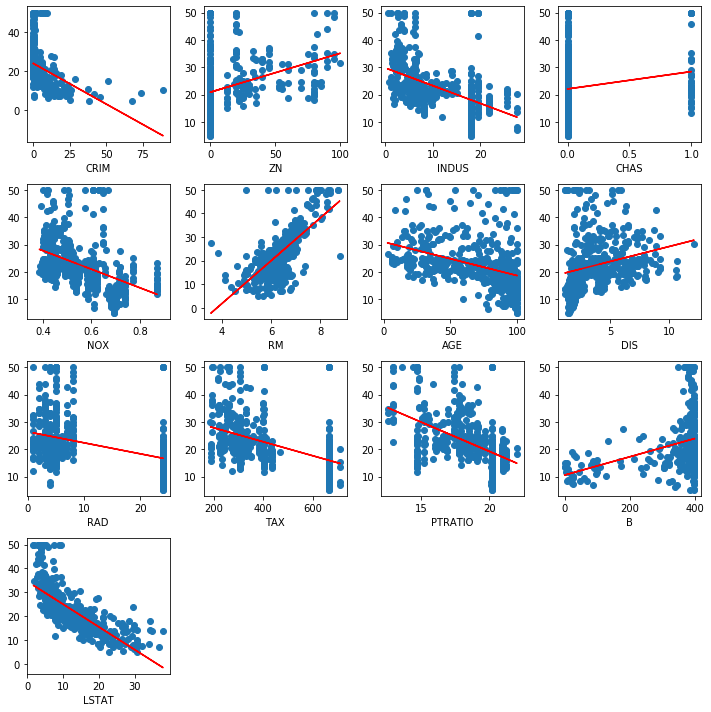

         Significant  Coefficient
CRIM            True    -0.415190
ZN              True     0.142140
INDUS           True    -0.648490
CHAS            True     6.346157
NOX             True   -33.916055
RM             False     9.102109
AGE             True    -0.123163
DIS             True     1.091613
RAD             True    -0.403095
TAX             True    -0.025568
PTRATIO         True    -2.157175
B               True     0.033593
LSTAT           True    -0.950049


In [41]:
# In Python, the Boston dataset is part of sklearn.datasets
from sklearn.datasets import load_boston
BostonData = load_boston()
Boston = pd.DataFrame(BostonData.data, columns = BostonData.feature_names)
Boston['MEDV'] = BostonData.target

def reportf(vname):
    i = np.where(BostonData.feature_names==vname)[0][0]+1
    frml = 'MEDV~'+vname
    model = smf.ols(frml, data = Boston)
    results = model.fit()
    print(results.summary())
    test=results.conf_int()[1]
    signif=test[0]>0 or test[1]<0 # TRUE if significant
    plt.subplot(4,4,i)
    plt.scatter(Boston[vname],Boston['MEDV'], label = 'data')
    plt.xlabel(vname)
    plt.plot(Boston[vname],results.fittedvalues, 'r-', label = 'model fit')
    out = [signif, results.params[1]]
    return out

plt.figure(figsize=(10,10))
slr = [reportf(x) for x in BostonData.feature_names]
plt.tight_layout()
plt.show()
slr = pd.DataFrame(slr, BostonData.feature_names, ['Significant' , 'Coefficient'])
print(slr)

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0$?

In [42]:
model = smf.ols('MEDV~'+' + '.join(BostonData.feature_names), data=Boston)
results = model.fit()
print(results.summary())
signif = results.pvalues<0.05
print('\n\nReject H_0:')
print(signif)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 19 Sep 2019   Prob (F-statistic):          6.72e-135
Time:                        12:13:39   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

#### (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

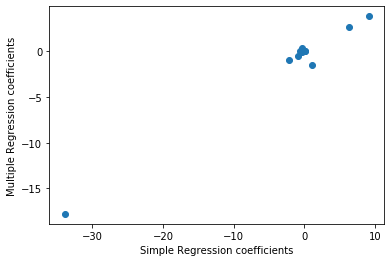

In [43]:
plt.scatter(slr['Coefficient'], results.params[1:15])
plt.xlabel('Simple Regression coefficients')
plt.ylabel('Multiple Regression coefficients')
plt.show()
#abline(a=0, b=1)

#### (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form 
$$
Y = \beta_0 + \beta_1 X + \beta_2X^2 + \beta_3 X^3 + \varepsilon.
$$

In [44]:
def reportf(vname):
    if (Boston[vname].nunique()<=3):
        return np.nan
    else:
        i = np.where(BostonData.feature_names==vname)[0][0]+1
        frml = vname.join(['MEDV~','+I(','**2)+I(','**3)'])
        model = smf.ols(frml, data = Boston)
        results = model.fit()
        print(results.summary())
        signif=any(results.pvalues[2:4]<0.05)
        return signif

polyfit=[reportf(x) for x in BostonData.feature_names]

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.57
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           1.45e-26
Time:                        12:13:39   Log-Likelihood:                -1778.1
No. Observations:                 506   AIC:                             3564.
Df Residuals:                     502   BIC:                             3581.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       25.1905      0.435     57.846   

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     48.89
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           9.82e-28
Time:                        12:13:40   Log-Likelihood:                -1775.4
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     502   BIC:                             3576.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      52.2160     13.966      3.739      

In [45]:
print(pd.DataFrame(polyfit,BostonData.feature_names,['Polynomial fit']))

        Polynomial fit
CRIM              True
ZN                True
INDUS             True
CHAS               NaN
NOX               True
RM                True
AGE              False
DIS               True
RAD               True
TAX              False
PTRATIO          False
B                False
LSTAT             True
